# Datos sintéticos

Uno de los mayores problemas a la hora de emplear datos empresariales es disponer de suficientes garantías de anonimato en caso de disponer de datos personales. En líneas generales, los datos sintéticos nos permiten entrenar generadores que pueden generar conjuntos de datos que presentan las mismas estadísticas que los datos originales siendo plenamente artificiales.

* Web: https://sdv.dev/
* Documentación: https://docs.sdv.dev/sdv

In [ ]:
!pip install sdv

In [1]:
from sdv.datasets.demo import download_demo

real_data, metadata = download_demo(
    modality='single_table',
    dataset_name='fake_hotel_guests'
)
real_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,michaelsanders@shaw.net,False,BASIC,37.89,27 Dec 2020,29 Dec 2020,131.23,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,False,BASIC,24.37,30 Dec 2020,02 Jan 2021,114.43,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,True,DELUXE,0.00,17 Sep 2020,18 Sep 2020,368.33,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380
3,gsims@terry.com,False,BASIC,NaN,28 Dec 2020,31 Dec 2020,115.61,"77 Massachusetts Ave\nCambridge, MA 02139",4969551998845740
4,misty33@smith.biz,False,BASIC,16.45,05 Apr 2020,NaN,122.41,"1234 Corporate Drive\nBoston, MA 02116",3558512986488983


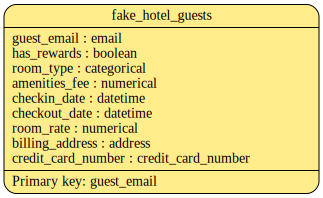

In [2]:
metadata.visualize()

In [15]:
from sdv.single_table import CTGANSynthesizer

synthesizer = CTGANSynthesizer(metadata)

In [16]:
synthesizer.fit(
    data=real_data
)

In [17]:
synthetic_data = synthesizer.sample(
    num_rows=500
)

synthetic_data.head()

,guest_email,has_rewards,room_type,amenities_fee,checkin_date,checkout_date,room_rate,billing_address,credit_card_number
0,dsullivan@example.net,True,BASIC,10.56,06 Oct 2020,30 Apr 2020,197.10,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,False,BASIC,10.76,18 Jun 2020,06 Dec 2020,227.61,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,False,BASIC,0.00,30 Jan 2020,27 Sep 2020,398.79,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788
3,humphreyjennifer@example.net,False,BASIC,19.67,20 May 2020,09 Jan 2020,99.02,"8906 Bobby Trail\nEast Sandra, NY 43986",3524946844839485
4,joshuabrown@example.net,True,DELUXE,5.23,12 Dec 2020,24 Jul 2020,128.47,"732 Dennis Lane\nPort Nicholasstad, DE 49786",4446905799576890978


In [18]:
from sdv.evaluation.single_table import run_diagnostic

diagnostic = run_diagnostic(
    real_data=real_data,
    synthetic_data=synthetic_data,
    metadata=metadata
)

Generating report ...

(1/2) Evaluating Data Validity: |██████████| 9/9 [00:00<00:00, 2190.62it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 722.53it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%



In [19]:
from sdv.evaluation.single_table import evaluate_quality

quality_report = evaluate_quality(
    real_data,
    synthetic_data,
    metadata
)

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 9/9 [00:00<00:00, 1398.10it/s]|
Column Shapes Score: 78.5%

(2/2) Evaluating Column Pair Trends: |██████████| 36/36 [00:00<00:00, 855.75it/s]|
Column Pair Trends Score: 76.64%

Overall Score (Average): 77.57%



In [20]:
quality_report.get_details('Column Shapes')

,Column,Metric,Score
0,has_rewards,TVComplement,0.810000
1,room_type,TVComplement,0.784000
2,amenities_fee,KSComplement,0.662739
3,checkin_date,KSComplement,0.790000
4,checkout_date,KSComplement,0.827083
5,room_rate,KSComplement,0.836000


In [21]:
sensitive_column_names = ['guest_email', 'billing_address', 'credit_card_number']

real_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,michaelsanders@shaw.net,"49380 Rivers Street\nSpencerville, AK 68265",4075084747483975747
1,randy49@brown.biz,"88394 Boyle Meadows\nConleyberg, TN 22063",180072822063468
2,webermelissa@neal.com,"0323 Lisa Station Apt. 208\nPort Thomas, LA 82585",38983476971380


In [22]:
synthetic_data[sensitive_column_names].head(3)

,guest_email,billing_address,credit_card_number
0,dsullivan@example.net,"90469 Karla Knolls Apt. 781\nSusanberg, CA 70033",5161033759518983
1,steven59@example.org,"6108 Carla Ports Apt. 116\nPort Evan, MI 71694",4133047413145475690
2,brandon15@example.net,86709 Jeremy Manors Apt. 786\nPort Garychester...,4977328103788


In [23]:
from sdv.evaluation.single_table import get_column_plot

fig = get_column_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_name='room_rate',
    metadata=metadata
)

fig.show()

In [24]:
from sdv.evaluation.single_table import get_column_pair_plot

fig = get_column_pair_plot(
    real_data=real_data,
    synthetic_data=synthetic_data,
    column_names=['checkin_date', 'checkout_date'],
    metadata=metadata
)

fig.show()

In [25]:
synthesizer.save('modelos/my_synthesizer.pkl')

### Con datos nuestros

Probemos como resultaría con datos con los que hemos trabajado antes...

In [2]:
import pandas as pd

titanic = pd.read_csv("../assets/data/titanic.csv")
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


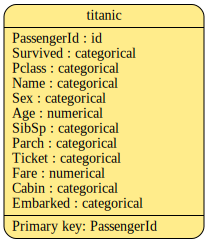

In [6]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=titanic,
    table_name='titanic')

metadata.visualize()

In [8]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(titanic)

In [9]:
fake_titanic = synthesizer.sample(num_rows=100)
fake_titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4326007,0,1,"Hoyt, Mrs. Frederick Maxfield (Jane Anne Forby)",female,39.11,0,0,2626,73.2513,D37,S
1,4069891,0,3,"Niskanen, Mr. Juha",male,29.45,0,0,A/5 2817,4.6504,NaN,S
2,2697777,0,2,"Betros, Mr. Tannous",male,38.61,1,0,113806,6.7210,NaN,S
3,10119885,1,3,"Parkes, Mr. Francis ""Frank""",male,28.06,0,2,347082,27.8694,NaN,C
4,4368626,0,1,"Oreskovic, Miss. Marija",male,NaN,0,0,230136,10.5493,NaN,S


In [11]:
from sdv.single_table import TVAESynthesizer

synthesizer = TVAESynthesizer(metadata)
synthesizer.fit(titanic)

synthesizer.sample(num_rows=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,4326007,0,3,"Haas, Miss. Aloisia",male,28.95,0,0,W/C 14208,9.3566,NaN,S
1,4069891,0,3,"Strom, Mrs. Wilhelm (Elna Matilda Persson)",female,21.65,1,1,382652,14.0295,NaN,S
2,2697777,0,3,"Markoff, Mr. Marin",male,29.36,0,0,349213,6.4788,NaN,S
3,10119885,0,3,"Masselmani, Mrs. Fatima",male,29.05,0,0,54636,7.5446,NaN,S
4,4368626,1,3,"Skoog, Mr. Wilhelm",female,NaN,1,0,A/5. 3336,29.0745,NaN,S
5,11641463,0,3,"Lester, Mr. James",male,NaN,0,0,A/4 48871,8.6512,NaN,S
6,7214272,0,3,"Maisner, Mr. Simon",male,28.80,0,0,350042,7.6396,NaN,S
7,9787275,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,29.62,1,0,2661,23.1181,NaN,S
8,4599517,0,3,"Henry, Miss. Delia",male,30.23,0,0,382649,7.0861,NaN,S
9,1953199,0,3,"Smith, Mr. Thomas",male,29.62,0,0,370377,6.4587,NaN,S


In [14]:
from sdv.sampling import Condition

low_class_male = Condition(
    num_rows=10,
    column_values={'Pclass': 3, 'Sex': 'male'}
)

high_class_female = Condition(
    num_rows=10,
    column_values={'Pclass': 1, 'Sex': 'female'}
)

synthetic_data = synthesizer.sample_from_conditions(
    conditions=[low_class_male, high_class_female],
)

Sampling conditions: 100%|██████████| 20/20 [00:00<00:00, 72.27it/s]


In [16]:
synthetic_data.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,8778194,0,3,"Phillips, Miss. Kate Florence (""Mrs Kate Louis...",male,29.47,0,0,250655,20.8426,NaN,S
1,5096780,0,3,"Humblen, Mr. Adolf Mathias Nicolai Olsen",male,28.56,0,0,348121,9.5591,NaN,S
2,3131220,0,3,"Williams, Mr. Leslie",male,28.09,0,0,1601,9.0421,NaN,S
3,13773414,1,3,"Bryhl, Mr. Kurt Arnold Gottfrid",male,16.30,0,0,2661,8.7327,NaN,S
4,12259313,0,3,"Horgan, Mr. John",male,28.46,0,0,330877,9.0348,NaN,S
5,14807002,0,3,"Turkula, Mrs. (Hedwig)",male,23.05,0,0,315097,9.3019,NaN,S
6,7576704,0,3,"Lemberopolous, Mr. Peter L",male,28.20,0,0,2683,7.9041,NaN,S
7,2068190,0,3,"Saad, Mr. Amin",male,17.25,0,0,A/S 2816,9.2340,NaN,S
8,4891226,0,3,"Cohen, Mr. Gurshon ""Gus""",male,18.64,0,0,STON/O2. 3101279,10.8021,NaN,S
9,2444519,1,3,"Moubarek, Master. Gerios",male,20.86,0,0,STON/O2. 3101279,7.6571,NaN,S


In [21]:
synthesizer = TVAESynthesizer(metadata, embedding_dim=256)
synthesizer.fit(titanic)

In [ ]:
synthesizer.sample_from_conditions(
    conditions=[low_class_male, high_class_female],
)

Sampling conditions: 100%|██████████| 20/20 [00:00<00:00, 123.14it/s]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,7710494,0,3,"Parkes, Mr. Francis ""Frank""",male,28.65,0,0,239853,4.6692,NaN,S
1,7551801,0,3,"Green, Mr. George Henry",male,21.58,0,0,21440,9.0164,NaN,S
2,4337276,0,3,"Badt, Mr. Mohamed",male,NaN,0,0,2620,9.5398,NaN,S
3,952258,0,3,"Nilsson, Miss. Helmina Josefina",male,NaN,0,0,349244,10.4156,NaN,S
4,16251090,0,3,"Baumann, Mr. John D",male,28.15,0,0,2699,22.1643,NaN,S
5,149377,0,3,"McGovern, Miss. Mary",male,NaN,0,0,371110,9.4352,NaN,S
6,378689,0,3,"Lindblom, Miss. Augusta Charlotta",male,30.00,0,0,54636,5.7553,NaN,S
7,1221140,0,3,"Lemore, Mrs. (Amelia Milley)",male,27.35,0,0,S.O./P.P. 3,10.7468,NaN,S
8,9563231,0,3,"Lievens, Mr. Rene Aime",male,23.51,0,0,345781,9.3658,NaN,S
9,10802859,0,3,"Moen, Mr. Sigurd Hansen",male,30.94,0,0,2623,8.5023,NaN,S


In [ ]:
from sdv.evaluation.single_table import get_column_plot

get_column_plot(
    real_data=titanic,
    synthetic_data=fake_titanic,
    metadata=metadata,
    column_name='Survived'
)

In [27]:
from sdv.evaluation.single_table import get_column_pair_plot

get_column_pair_plot(
    real_data=titanic,
    synthetic_data=fake_titanic,
    metadata=metadata,
    column_names=['Survived', 'Sex'],
)